In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/raw/cell_diagnosis_balanced_dev.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1333 non-null   float64
 1   CellShape            1347 non-null   float64
 2   NucleusDensity       1362 non-null   float64
 3   ChromatinTexture     1366 non-null   float64
 4   CytoplasmSize        1347 non-null   float64
 5   CellAdhesion         1369 non-null   float64
 6   MitosisRate          1343 non-null   float64
 7   NuclearMembrane      1343 non-null   float64
 8   GrowthFactor         1359 non-null   float64
 9   OxygenSaturation     1375 non-null   float64
 10  Vascularization      1347 non-null   float64
 11  InflammationMarkers  1358 non-null   float64
 12  Diagnosis            1663 non-null   float64
 13  CellType             1407 non-null   object 
 14  GeneticMutation      1663 non-null   object 
dtypes: float64(13), object(2)
memory usage

In [4]:
df.head(60)

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,CellType,GeneticMutation
0,63.423148,0.500594,1.473261,23.300222,NaN,0.477657,3.434832,2.492852,-10.000000,78.625935,5.727217,41.158399,0.0,Epthlial,Absnt
1,72.906362,0.474808,1.361360,21.336137,29.856233,0.481035,2.702433,2.281137,63.084699,NaN,5.319552,NaN,1.0,Epthlial,Presnt
2,70.711969,0.481701,NaN,21.521406,30.582427,0.472651,2.786606,2.318029,61.347022,NaN,NaN,NaN,1.0,???,Absnt
3,73.210206,NaN,1.427612,22.437077,29.887970,0.439511,2.998380,2.149232,64.047169,80.693058,NaN,37.843069,1.0,Mesnchymal,Presnt
4,68.348288,NaN,1.454116,21.150723,28.328197,NaN,2.987601,NaN,62.197197,81.737990,4.347438,43.444881,1.0,Epthlial,Presnt
5,63.467884,0.494407,1.498820,NaN,25.726299,0.495899,3.448799,2.569467,61.975846,-10.000000,4.997996,NaN,0.0,NaN,Absnt
6,73.561818,0.411228,NaN,20.907749,NaN,NaN,NaN,NaN,NaN,80.459205,5.265183,38.529407,0.0,NaN,Absnt
7,NaN,2.849222,7.382190,229.184799,271.103974,3.031756,16.903603,11.629804,368.951520,708.325448,30.070563,228.756033,1.0,Mesnchymal,Presnt
8,69.595755,0.538546,1.362151,21.314999,28.983911,NaN,2.758535,2.350355,60.176673,78.707212,4.308372,39.523200,1.0,???,Presnt
9,64.818977,0.499523,1.517036,21.567709,25.765601,0.450034,NaN,2.561499,60.993969,79.896467,5.582320,NaN,0.0,NaN,Presnt


In [15]:
sns.set(style="whitegrid", context="notebook")

df = pd.read_csv("data/raw/cell_diagnosis_balanced_dev.csv")

TARGET = "Diagnosis"
NUM_COLS = [
    "CellSize","CellShape","NucleusDensity","ChromatinTexture","CytoplasmSize",
    "CellAdhesion","MitosisRate","NuclearMembrane","GrowthFactor",
    "OxygenSaturation","Vascularization","InflammationMarkers"
]
CAT_COLS = ["CellType","GeneticMutation"]

# asegurar tipos
for c in NUM_COLS:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce").astype(int)
for c in CAT_COLS:
    df[c] = df[c].astype("string")  # tratamos '???' como string válido (Unknown)

In [16]:
print("Shape:", df.shape)
display(df.dtypes)

# % de nulos por columna
nulls = df.isna().mean().sort_values(ascending=False)*100
display(nulls.to_frame("% NaN").style.format("{:.1f}%"))

# conteo de clases (target)
print("Distribución del target:")
print(df[TARGET].value_counts(normalize=True).rename("prop").round(3))

Shape: (1663, 15)


CellSize                      float64
CellShape                     float64
NucleusDensity                float64
ChromatinTexture              float64
CytoplasmSize                 float64
CellAdhesion                  float64
MitosisRate                   float64
NuclearMembrane               float64
GrowthFactor                  float64
OxygenSaturation              float64
Vascularization               float64
InflammationMarkers           float64
Diagnosis                       int64
CellType               string[python]
GeneticMutation        string[python]
dtype: object

,% NaN
CellSize,19.8%
MitosisRate,19.2%
NuclearMembrane,19.2%
CytoplasmSize,19.0%
CellShape,19.0%
Vascularization,19.0%
InflammationMarkers,18.3%
GrowthFactor,18.3%
NucleusDensity,18.1%
ChromatinTexture,17.9%


Distribución del target:
Diagnosis
0    0.55
1    0.45
Name: prop, dtype: float64



CellType - value_counts:
CellType
Epthlial      491
???           483
Mesnchymal    433
Unknown       256
Name: count, dtype: Int64


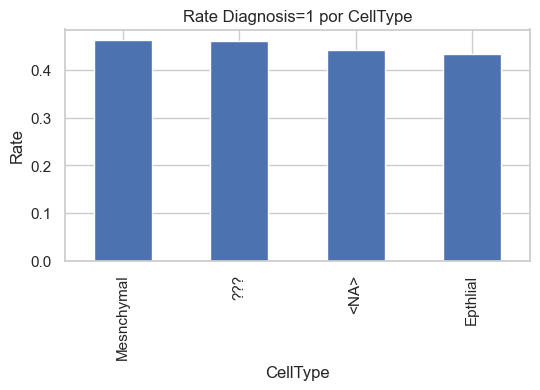

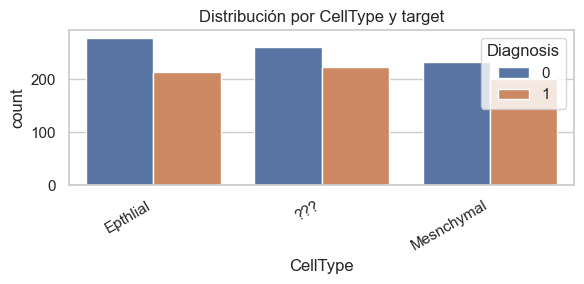


GeneticMutation - value_counts:
GeneticMutation
Presnt    848
Absnt     815
Name: count, dtype: Int64


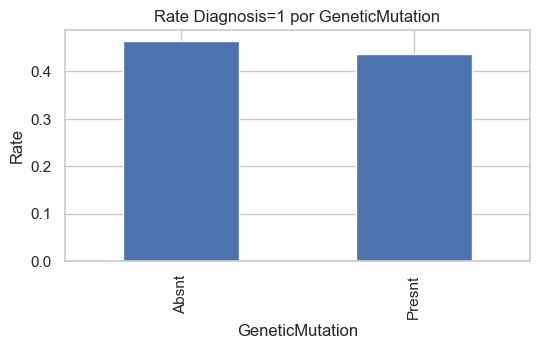

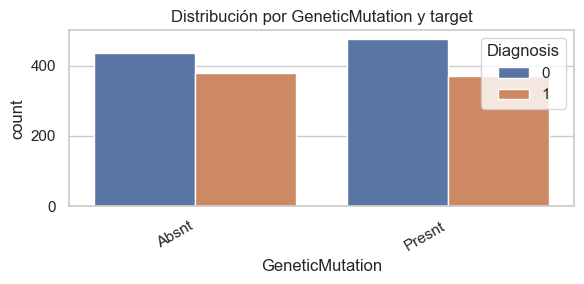

In [17]:
for c in CAT_COLS:
    print(f"\n{c} - value_counts:")
    print(df[c].fillna("Unknown").value_counts())

    # tasa de positivos (Diagnosis==1) por categoría
    rates = df.groupby(c, dropna=False)[TARGET].mean().sort_values(ascending=False)
    ax = rates.plot(kind="bar", figsize=(6,3), title=f"Rate Diagnosis=1 por {c}")
    ax.set_ylabel("Rate")
    plt.show()

    # countplot
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=c, hue=TARGET)
    plt.title(f"Distribución por {c} y target")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
CellSize,1333.0,83.247087,100.316719,-100.000000,66.572149,69.704323,72.653147,1000.000000
CellShape,1347.0,0.598657,0.565438,-1.413038,0.479758,0.498832,0.523018,5.048566
NucleusDensity,1362.0,2.097344,4.987573,-3.000000,1.397010,1.445035,1.485651,50.000000
ChromatinTexture,1366.0,26.094973,24.842157,10.000000,21.279126,22.066810,22.823319,263.793425
CytoplasmSize,1347.0,33.989815,32.809627,5.000000,26.304514,28.448318,30.506774,299.350559
CellAdhesion,1369.0,0.548800,0.612232,-4.461755,0.456400,0.474836,0.494613,5.029925
MitosisRate,1343.0,5.326484,11.572456,-50.000000,2.776731,3.080247,3.423066,100.000000
NuclearMembrane,1343.0,2.825365,2.697956,-3.438990,2.254502,2.414464,2.534339,24.871762
GrowthFactor,1359.0,74.126375,77.819461,-50.000000,58.170436,60.993969,63.041642,563.622684
OxygenSaturation,1375.0,93.199374,82.574244,-10.000000,79.130570,79.987328,80.986905,807.181058


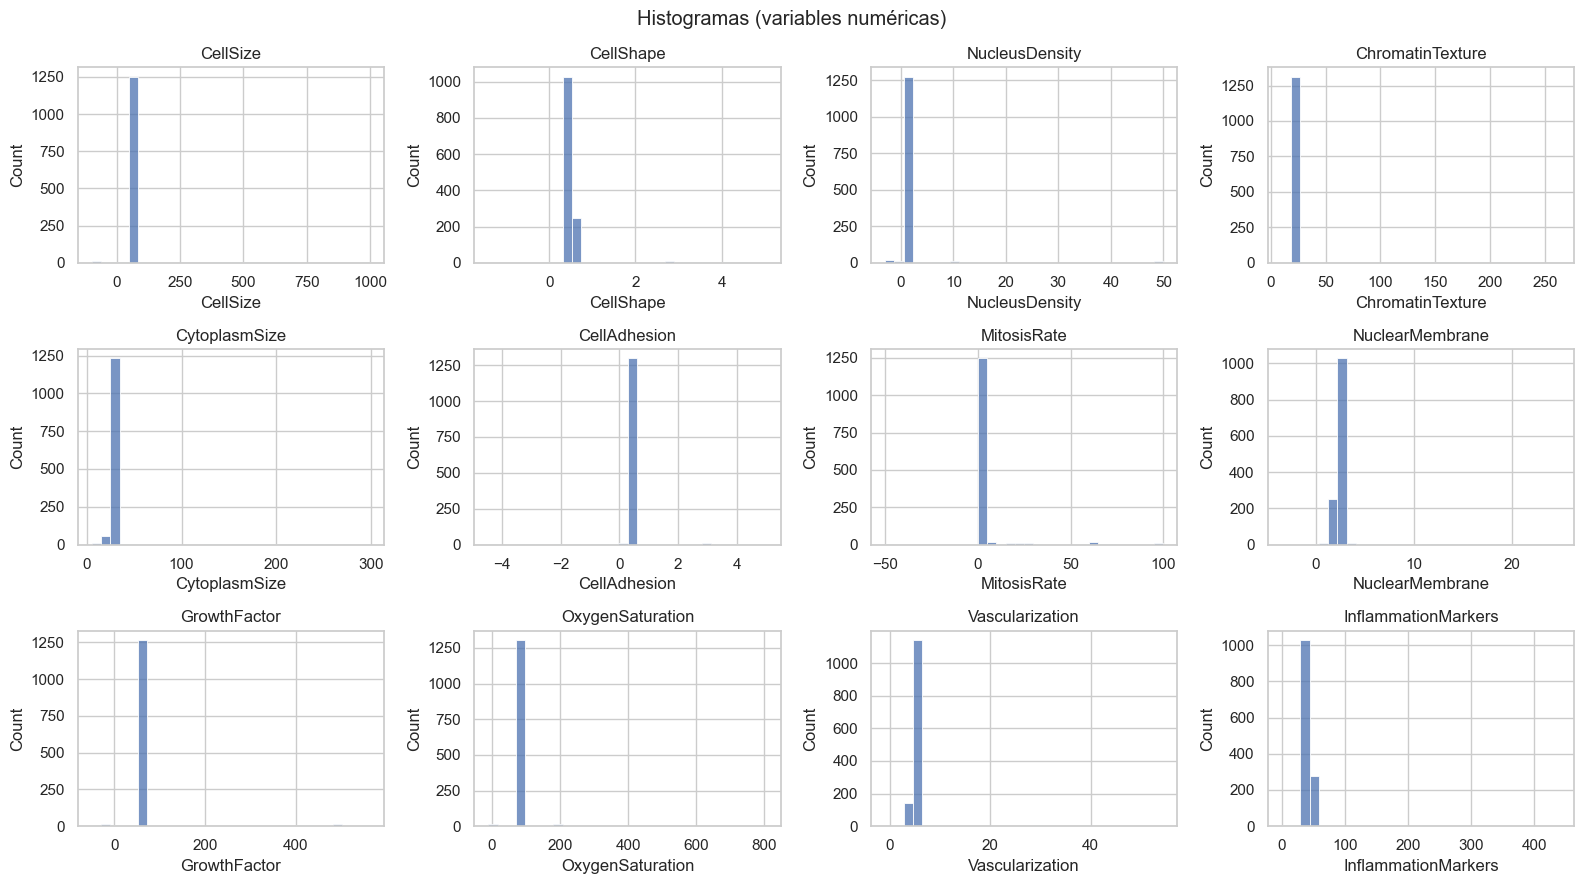

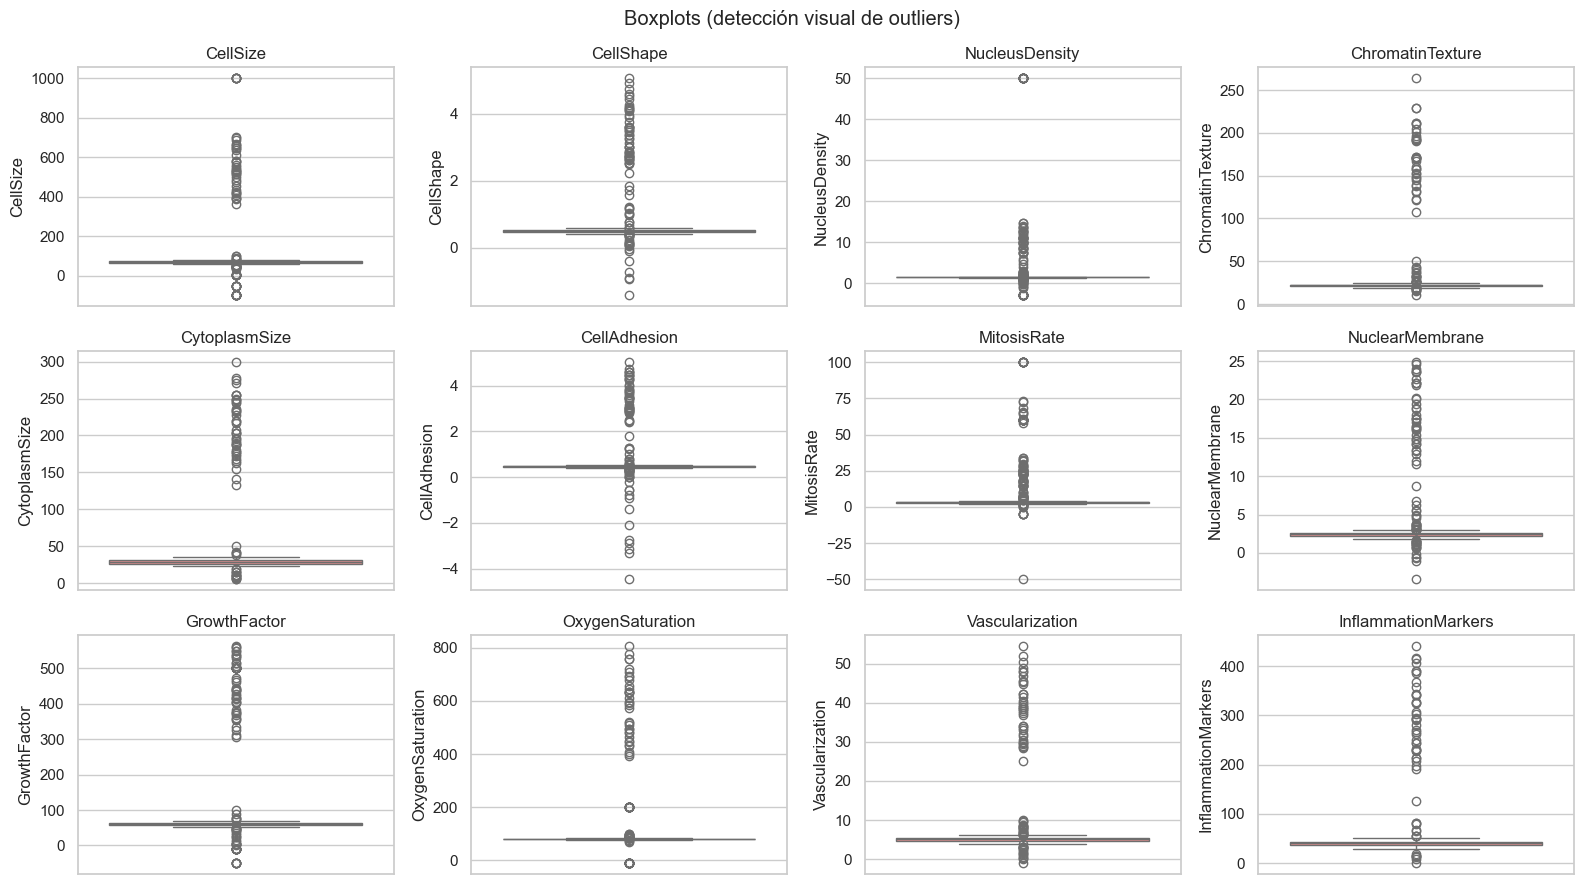

In [18]:
display(df[NUM_COLS].describe().T)

# histogramas
n = len(NUM_COLS)
rows = int(np.ceil(n/4))
fig, axes = plt.subplots(rows, 4, figsize=(16, 3*rows))
axes = axes.flatten()
for i, col in enumerate(NUM_COLS):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=False)
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Histogramas (variables numéricas)")
plt.tight_layout()
plt.show()

# boxplots (para ver outliers)
rows = int(np.ceil(n/4))
fig, axes = plt.subplots(rows, 4, figsize=(16, 3*rows))
axes = axes.flatten()
for i, col in enumerate(NUM_COLS):
    sns.boxplot(y=df[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Boxplots (detección visual de outliers)")
plt.tight_layout()
plt.show()

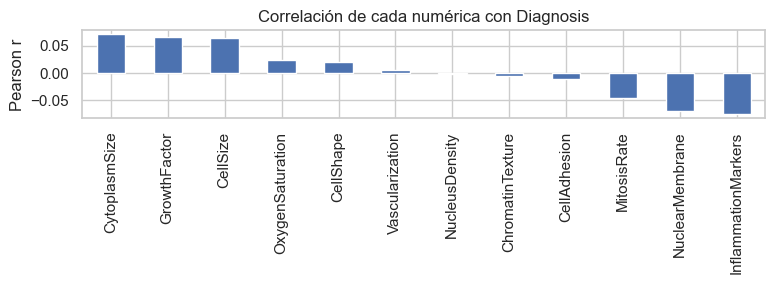

,corr_con_target
CytoplasmSize,0.070
GrowthFactor,0.066
CellSize,0.064
OxygenSaturation,0.024
CellShape,0.020
Vascularization,0.006
NucleusDensity,-0.001
ChromatinTexture,-0.006
CellAdhesion,-0.011
MitosisRate,-0.046


In [19]:
corr = df[NUM_COLS + [TARGET]].corr(numeric_only=True)[TARGET].drop(TARGET).sort_values(ascending=False)
ax = corr.plot(kind="bar", figsize=(8,3), title="Correlación de cada numérica con Diagnosis")
ax.set_ylabel("Pearson r")
plt.tight_layout()
plt.show()

display(corr.to_frame("corr_con_target").round(3))

In [20]:
expected_ranges = {
    "CellAdhesion": (0, 1),
    "NuclearMembrane": (1, 5),
    "OxygenSaturation": (0, 100),
    "Vascularization": (0, 10),
    "InflammationMarkers": (0, 100),
    # si querés agregar límites blandos para otros (ej. tamaño >0), ponelos acá:
    "CellSize": (0, np.inf),
    "CytoplasmSize": (0, np.inf),
    "MitosisRate": (0, np.inf),
}

out_of_range = []
for col, (lo, hi) in expected_ranges.items():
    s = df[col].dropna()
    n_bad = ((s < lo) | (s > hi)).sum()
    if n_bad > 0:
        out_of_range.append((col, int(n_bad)))
pd.DataFrame(out_of_range, columns=["columna", "fuera_de_rango"])

,columna,fuera_de_rango
0,CellAdhesion,57
1,NuclearMembrane,51
2,OxygenSaturation,67
3,Vascularization,38
4,InflammationMarkers,38
5,CellSize,20
6,MitosisRate,6


In [5]:
# imputar nulos en columnas numéricas con la media de cada columna
df_num = df.select_dtypes(include=[float, int])
df[df_num.columns] = df_num.fillna(df_num.mean())

df = pd.get_dummies(df, columns=["CellType", "GeneticMutation"], drop_first=True)

In [8]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"].values  # lo paso a array de numpy

In [13]:
np.random.seed(42)
indices = np.random.permutation(len(X))      # baraja los índices 0..n-1

cut = int(0.8 * len(X))                      # 80% para train
train_idx, val_idx = indices[:cut], indices[cut:]

X_train = X.iloc[train_idx].values           # filas barajadas para train
X_val   = X.iloc[val_idx].values             # filas barajadas para val
y_train = y[train_idx]
y_val   = y[val_idx]

print(f"Train: X_Train = {X_train.shape}, y_Train = {y_train.shape[0]}")
print(f"Validation: X_Val = {X_val.shape}, y_Val = {y_val.shape[0]}")

Train: X_Train = (1330, 15), y_Train = 1330
Validation: X_Val = (333, 15), y_Val = 333


In [23]:
train_df = df.iloc[train_idx].copy()
val_df   = df.iloc[val_idx].copy()

# categóricas: '???' -> 'Unknown'
for c in CAT_COLS:
    if c in train_df:
        train_df[c] = train_df[c].fillna("Unknown").replace("???","Unknown").astype("string")
        val_df[c]   = val_df[c].fillna("Unknown").replace("???","Unknown").astype("string")

# imputación (NUM) con mediana del TRAIN
num_median = train_df[NUM_COLS].apply(pd.to_numeric, errors="coerce").median()
train_df[NUM_COLS] = train_df[NUM_COLS].fillna(num_median)
val_df[NUM_COLS]   = val_df[NUM_COLS].fillna(num_median)

# one-hot: fijar categorías del TRAIN y aplicarlas a VAL
train_X = pd.get_dummies(train_df.drop(columns=[TARGET]), columns=CAT_COLS, drop_first=True)
val_X   = pd.get_dummies(val_df.drop(columns=[TARGET]),   columns=CAT_COLS, drop_first=True)
val_X   = val_X.reindex(columns=train_X.columns, fill_value=0)  # mismas cols/orden

# z-score con parámetros del TRAIN
mu = train_X.mean()
sd = train_X.std().replace(0, 1.0)
train_X = (train_X - mu) / sd
val_X   = (val_X   - mu) / sd

# targets
y_train = train_df[TARGET].astype(int).to_numpy()
y_val   = val_df[TARGET].astype(int).to_numpy()

# pasar a numpy para el modelo
X_train = train_X.to_numpy()
X_val   = val_X.to_numpy()

print(X_train.shape, y_train.shape[0], X_val.shape, y_val.shape[0])

(1330, 15) 1330 (333, 15) 333
